**Crop Yield prediction using Linear Regression**

In [49]:
import torch
import numpy as np
## torch neural network library
import torch.nn as nn

#" Activate qt[ type %matplotlib qt] to see graph in GUI window with rotation and other features"
%matplotlib inline

# inputs are in the form[temperature,humidity,rainfall]

# targets are [yield of crop 1, yield of crop 2]

inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


In [50]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [52]:
# importing dataloader module, inputs taken as batches and shuffled to randomize
from torch.utils.data import DataLoader
batch = 5
dl_train = DataLoader(train_ds, batch, shuffle=True)
dl_train

In [53]:
# printing loaded data
for x, y in dl_train:
    print(x)
    print(y)
    break

tensor([[ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.]])
tensor([[ 81., 101.],
        [ 22.,  37.],
        [119., 133.],
        [103., 119.],
        [ 56.,  70.]])


In [54]:
import torch.nn as nn
## Linear, a torch function for randomizing weights and biases and returns an array
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5565, -0.2421, -0.0919],
        [ 0.3875,  0.4383,  0.2777]], requires_grad=True)
Parameter containing:
tensor([ 0.4438, -0.2333], requires_grad=True)


In [55]:
list(model.parameters())
preds = model(inputs)
preds


tensor([[-60.3550,  69.3589],
        [-77.3864,  91.3695],
        [-85.7449, 108.3143],
        [-70.1331,  68.4103],
        [-67.6307,  88.0179]], grad_fn=<AddmmBackward>)

In [56]:
import torch.nn.functional as L
## loss function
_loss_= L.mse_loss
loss = _loss_(model(inputs),targets)
print(loss)

tensor(12079.7607, grad_fn=<MseLossBackward>)


In [57]:
## optimizer function
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
import matplotlib.pyplot as plt
values=[]
c=0
## training the model for 100- epochs
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
   
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for x,y in train_dl:
            
            # 1. Generate predictions
            pred = model(x)
            
            # 2. Calculate loss
            loss = loss_fn(pred, y)
            
            # 3. Compute gradient
            loss.backward()
            
            # 4. update values using optimizer function
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Progress of training
        if (epoch+1) % 10 == 0:
            values.append(loss.item())
            #print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

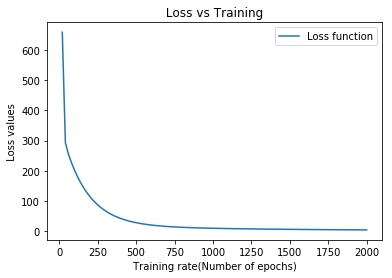

In [58]:
# running the model
fit(1000, model, _loss_, optimizer, dl_train)
#print(len(values))
x=[20*(i+1) for i in range(0,100)]
import matplotlib.pyplot as plt
plt.plot(x,values,label="Loss function")
plt.xlabel(" Training rate(Number of epochs) ")
plt.ylabel(" Loss values ")
plt.title(" Loss vs Training ")
plt.legend()
plt.show()

In [59]:
preds = model(inputs)
preds=preds.detach().numpy()
preds

array([[ 57.339245,  70.471596],
       [ 81.41148 ,  99.098946],
       [120.22366 , 136.26985 ],
       [ 21.565153,  38.020138],
       [100.34289 , 115.77149 ]], dtype=float32)

In [60]:
# compare predictions with targets
targets=targets.detach().numpy()
targets

array([[ 56.,  70.],
       [ 81., 101.],
       [119., 133.],
       [ 22.,  37.],
       [103., 119.]], dtype=float32)

In [61]:
# new prediction using the trained model
test=model(torch.tensor([[75, 63, 44.]]))
test=list(test.detach().numpy())
test


[array([53.61783, 67.16322], dtype=float32)]

[57.339245, 70.471596, 81.41148, 99.098946, 120.22366, 136.26985, 21.565153, 38.020138, 100.34289, 115.77149] 10
[56.0, 70.0, 81.0, 101.0, 119.0, 133.0, 22.0, 37.0, 103.0, 119.0] 10


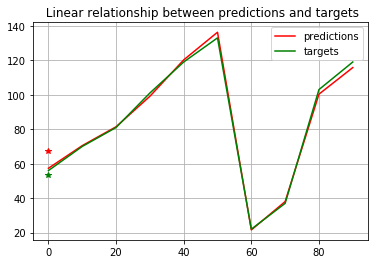

In [62]:
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(len(preds)):
    for j in range(2):
        x.append(preds[i][j])
        y.append(targets[i][j])
print(x,len(x))
print(y,len(y))
x1=[10*i for i in range(0,10)]

plt.title(" Linear relationship between predictions and targets")
plt.plot(x1,x,color='red',label= "predictions")
plt.plot(x1,y,color='green',label= "targets")
plt.legend()
plt.plot(test[0][0],marker='*',color='green')
plt.plot(test[0][1],marker='*',color='red')
plt.grid()
plt.show()

In [63]:
x_=inputs.detach().numpy()
print(x_)
# taking only temperature and humidity values for plotting in 3D 
_x_=[x_[i][j] for i in range(5) for j in range(3) if j!=2 ]
print(_x_)
_x1=[]
_x2=[]
for i in range(0,10):
    if(i%2==0):
        _x1.append(_x_[i])
    else:
        _x2.append(_x_[i])
    
print(_x1,_x2)


[[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]
[73.0, 67.0, 91.0, 88.0, 87.0, 134.0, 102.0, 43.0, 69.0, 96.0]
[73.0, 91.0, 87.0, 102.0, 69.0] [67.0, 88.0, 134.0, 43.0, 96.0]


In [64]:
y_=preds
print(y_)
_y1=[]
_y2=[]
t1=[]
t2=[]
# taking only predictions of one crop
for i in range(0,5):
    for j in range(0,5):
        if(j==0):
            _y1.append(y_[i][j])
        if(j==1):
            _y2.append(y_[i][j])
print(_y1,_y2)
print(targets)
for i in range(0,5):
    for j in range(0,5):
        if(j==0):
            t1.append(targets[i][j])
        if(j==1):
            t2.append(targets[i][j])
print(t1,t2)

[[ 57.339245  70.471596]
 [ 81.41148   99.098946]
 [120.22366  136.26985 ]
 [ 21.565153  38.020138]
 [100.34289  115.77149 ]]
[57.339245, 81.41148, 120.22366, 21.565153, 100.34289] [70.471596, 99.098946, 136.26985, 38.020138, 115.77149]
[[ 56.  70.]
 [ 81. 101.]
 [119. 133.]
 [ 22.  37.]
 [103. 119.]]
[56.0, 81.0, 119.0, 22.0, 103.0] [70.0, 101.0, 133.0, 37.0, 119.0]


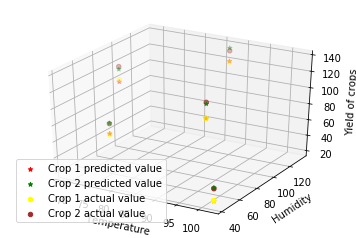

In [65]:
# Here, the magic happens! 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')

# plotting a 3D scatter plot to visualize actual vs predicted values

ax.scatter3D(_x1,_x2,_y1,color='red',label="Crop 1 predicted value",marker='*')
ax.scatter3D(_x1,_x2,_y2,color='green',label="Crop 2 predicted value",marker='*')
ax.scatter3D(_x1,_x2,t1,color='yellow',label="Crop 1 actual value")
ax.scatter3D(_x1,_x2,t2,color='brown',label="Crop 2 actual value")

ax.set_xlabel(" Temperature ")
ax.set_ylabel("Humidity")
ax.set_zlabel("Yield of crops")
plt.rcParams["figure.figsize"] = (5,5)
plt.legend()
plt.show()

In [ ]:
# Abhishek